In [31]:
"""
4 Technologies Used:
1. NetworkX -- For analysing network properties of the C. elegans neural network (metric functions, reading gml, etc)
2. NetworkX - For efficient network visualisation 
3. Numpy, Operator -- Data Processing (some optimization)
4. Matplotlib -- Data Visualisation (in-degrees, out-degrees)
"""

'\n4 Technologies Used:\n1. NetworkX -- For analysing network properties of the C. elegans neural network (metric functions, reading gml, etc)\n2. NetworkX - For efficient network visualisation \n3. Numpy, Operator -- Data Processing (some optimization)\n4. Matplotlib -- Data Visualisation (in-degrees, out-degrees)\n'

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline

Number of Nodes:  297


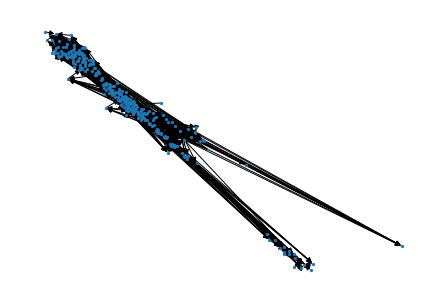

In [43]:
# ~300 neurons 
worm_brain = nx.read_gml('celegansneural.gml')
nx.draw(worm_brain, node_size=5)
print("Number of Nodes: ", len(worm_brain.nodes()))

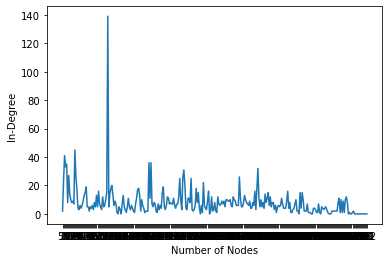

In [29]:
in_degrees = []
out_degrees = []
ns = []
for g in worm_brain.nodes():
    ns.append(g)
    in_degrees.append(worm_brain.in_degree(g))
    out_degrees.append(worm_brain.out_degree(g))

node_ids_optimized = np.array(ns)
in_degs_optimized = np.array(in_degrees)
out_degs_optimized = np.array(out_degrees)


# Was not included in the paper (only largest SCC one was)
plt.xlabel("Number of Nodes")
plt.ylabel("In-Degree")

plt.plot(node_ids_optimized, in_degs_optimized)
    


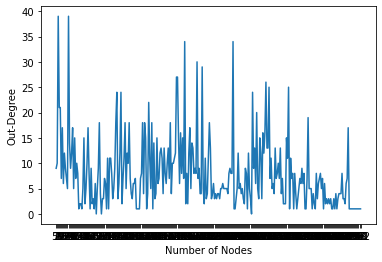

In [30]:
plt.xlabel("Number of Nodes")
plt.ylabel("Out-Degree")

plt.plot(node_ids_optimized, out_degs_optimized)

In [7]:
avg_shortest_path = nx.average_shortest_path_length(worm_brain)
print("Average Shortest Path Length: ", avg_shortest_path)

Average Shortest Path Length:  3.0715601965601964


In [11]:
# Need to convert the repeated edges to weights to use clustering functionality in NetworkX
diGraphConversion = nx.DiGraph()
for x, y in worm_brain.edges():
    if diGraphConversion.has_edge(x,y):
        diGraphConversion[x][y]['weight'] += 1
    else:
        diGraphConversion.add_edge(x, y, weight=1)

clustering = nx.average_clustering(diGraphConversion,weight='weight')
print("Clustering: ", clustering)

Clustering:  0.08722076757361004


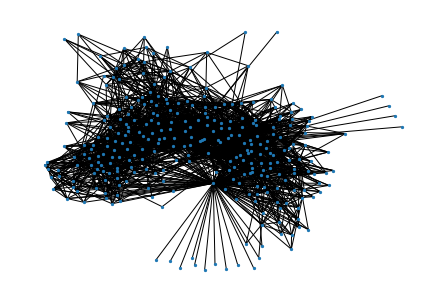

In [22]:
#Small-World Coefficient (Computationally Intensive)
undiGraphConversion = nx.Graph()
for x, y in worm_brain.edges():
    if not undiGraphConversion.has_edge(x,y):
        undiGraphConversion.add_edge(x, y)
nx.draw(undiGraphConversion, node_size=5)
small_world_coeff = nx.omega(undiGraphConversion)
print("Small Worldness Coefficient: ", small_world_coeff)

In [34]:
# Centrality Metrics
betweenness_centrality = nx.betweenness_centrality(diGraphConversion)
degree_centrality = nx.degree_centrality(diGraphConversion)
closeness_centrality = nx.closeness_centrality(diGraphConversion)
eigenvec_centrality = nx.eigenvector_centrality(diGraphConversion)



In [39]:
from operator import itemgetter

sorted_by_bet = sorted(betweenness_centrality.items(), key=itemgetter(1), reverse=True)

for x in sorted_by_bet[:15]:
        print(x)

('195', 0.10525345640186991)
('178', 0.0805820534285558)
('216', 0.07875381847250694)
('196', 0.07479738898686153)
('217', 0.07069285724073872)
('71', 0.06543913424902745)
('72', 0.05770078378292375)
('239', 0.05110432781978005)
('269', 0.04627970394188601)
('167', 0.04478407093832948)
('198', 0.04374940180797673)
('90', 0.03901987172773179)
('189', 0.03799851701667865)
('120', 0.036042354285432614)
('238', 0.03541255119387855)


In [38]:
sorted_by_deg = sorted(degree_centrality.items(), key=itemgetter(1), reverse=True)

for x in sorted_by_deg[:15]:
        print(x)

('305', 0.45270270270270274)
('71', 0.28040540540540543)
('72', 0.2702702702702703)
('217', 0.20270270270270271)
('216', 0.19932432432432434)
('76', 0.19594594594594594)
('78', 0.1891891891891892)
('77', 0.18243243243243246)
('73', 0.18243243243243246)
('74', 0.18243243243243246)
('75', 0.17905405405405406)
('198', 0.17567567567567569)
('90', 0.14864864864864866)
('178', 0.14864864864864866)
('89', 0.13513513513513514)


In [40]:
sorted_by_closeness = sorted(closeness_centrality.items(), key=itemgetter(1), reverse=True)

for x in sorted_by_closeness[:15]:
        print(x)

('305', 0.5767025248933143)
('71', 0.2906126126126126)
('72', 0.2898397067280046)
('187', 0.28566115263362973)
('77', 0.2852872506013867)
('236', 0.28417139434088584)
('74', 0.2819656655361701)
('235', 0.2816013688106711)
('237', 0.2808755920869323)
('238', 0.28015354686305843)
('78', 0.2794352044352044)
('73', 0.27907741288022975)
('306', 0.27833624270149887)
('239', 0.2765982988064207)
('188', 0.2762477306203542)


In [41]:
sorted_by_eig = sorted(eigenvec_centrality.items(), key=itemgetter(1), reverse=True)

for x in sorted_by_eig[:15]:
        print(x)

('305', 0.5804838559101525)
('71', 0.16561864322415995)
('72', 0.15213320713012793)
('146', 0.14961700325038496)
('276', 0.1473298243859719)
('73', 0.14634804961333125)
('74', 0.13275082367189303)
('76', 0.13008626986225136)
('234', 0.12814400157429837)
('75', 0.1253780540956479)
('227', 0.1224645248574717)
('237', 0.12174798944051629)
('78', 0.11854872374133704)
('236', 0.1181118622061037)
('235', 0.11618722010572902)
